# Text Analysis

All methods presented in previous chapters use numerical input for data analysis. Traditional financial analysis relies primarily on structured numerical data, such as balance sheets, income statements, and stock price trends. In contrast, text-based analysis draws insights from unstructured data sources like reports, news, and transcripts, emphasizing qualitative factors such as sentiment, tone, and contextual details. While traditional methods are rooted in historical performance and quantitative measures, text-based approaches can uncover non-financial factors such as changes in business operations or an entities willingness to transition towards climate friendly policies.

Due to the increasing availability of statistical and computational methods for processing text experienced a fast and impressive development in the past decades. Digitalization plays a major role with this respect as text can be extracted as content on web pages using hypertext markup language (HTML) or by downloading common text files such as pdf-files. 

Roughly, the process of text analysis is:

* Preprocess text
* Convert text into a numerical representation
* Use the numerical representation of statistical analysis

We are going to go through these bullet points step by step. This chapter represents a small introduction into the field of text analysis. Text analysis or text mining are disciplines at the intersection of different academic fields such as computer science, linguistic, math and statistics. This intersection is an academic field called natural language processing. It is a subfield of artificial intelligence (AI) and computer science that focuses on enabling computers to understand, interpret, generate, and interact with human language in a meaningful way. It combines computational techniques with linguistic rules and models to process and analyze textual or spoken data.

Before, we start, let us define some common terms which are often used for text analysis.

* Corpus: a collection of documents
* Document: a sequence of tokens
* Token: an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing, e.g., a word or subword
* Type: the class of all tokens containing the same character sequence
* Term: Unique tokens or combinations, usually defined
* Vocabulary/Dictionary: identifier to term mapping

For instance, if we have two documents:

* D1: Financial data analysis is great
* D2: Text analysis is awesome

The corpus is given by $C = \lbrace d_1, d_2 \rbrace$. If we split each sequence by whitespaces, we get a list of tokens for each document:

* [Financial, data, analysis, is, great]
* [Text, analysis, is, awesome]

The set of types are:

* Financial
* data
* analysis
* Text
* is
* great
* awesome

Terms we are interested are unique tokens or, e.g., we could define "Financial data analysis" or "Text analysis" to be unique terms. If we just use unique words in our example, a vocabulary or dictionary simply map an identifier to a unique token.

## Text preprocessing

Text preprocessing is a crucial start for text analysis and involves preparing and cleaning raw text data to make it suitable for analysis or as input to machine learning models. It ensures the data is consistent and structured. We may encounter very different approaches of text preprocessing, but, usually they are a combination of different approaches which may or may not be used for specific use cases.

### Normalize text input

Sometimes text includes characters which we want to avoid or exclude, e.g., accents, extra whitespaces, etc. Furthermore, we may want to use lowercase letters to keep the set of unique tokens smaller. Such steps are usually conducted first. See an example below.

In [1]:
from tokenizers.normalizers import NFD, Strip, StripAccents, Lowercase
from tokenizers.normalizers import Sequence as NormalizerSequence

normalizer = NormalizerSequence([NFD(), Strip(), StripAccents(), Lowercase()])

d1 = " This is a véry non-standardized 12 string."
d1_normalized = normalizer.normalize_str(d1)

print("Raw document:")
print(d1)
print("-"*50)
print("Document after normalization:")
print(d1_normalized)

Raw document:
 This is a véry non-standardized 12 string.
--------------------------------------------------
Document after normalization:
this is a very non-standardized 12 string.


### Tokenization

Before, we identify tokens in each document, we can set rules how tokens should be identified. For instance, if we want tokens not to include whitespaces, digits or punctuation, we first split the text by these identifiers. 

In [2]:
from tokenizers.pre_tokenizers import Whitespace, Punctuation, Digits
from tokenizers.pre_tokenizers import Sequence as TokenizerSequence

pre_tokenizer = TokenizerSequence([Whitespace(), Punctuation(), Digits(individual_digits=False)])
tokens_and_positions = pre_tokenizer.pre_tokenize_str(d1_normalized)
print("List of tokens after pre-tokenization:")
print("-"*75)
tokens = []
for token, position in tokens_and_positions:
    print(token)
    tokens.append(token)


List of tokens after pre-tokenization:
---------------------------------------------------------------------------
this
is
a
very
non
-
standardized
12
string
.


After the above process which is called pre-tokenization, we can use each individual element as a token. This is word-level tokenization and very common. However, we could also use algorithm to detect tokens as subwords or other meaningful grouped sequences of characters. The latter is often used for modern language models. As this chapter is a short introduction to text analysis, we leave the exploration of such algorithms to your future academic career. 

For some text models, it is better to keep the number of unique tokens as small as possible. This is where techniques such as stop word removal, stemming or lemmatization can be used. 

### Stopwords

While some words may be very special and, thus, very informative for a specific text, other words appear frequently in every text. Examples are the, and, this, that, or, etc., due to their frequent use, these words do not reveal specific content of sentences, paragraphs and so on. This is why we may want to delete these words from the original text which simplifies the processing of the information contained. The cell below shows the first ten list of the stopwords dictionary of the gensim package. Note that stopword lists need to be defined first and can also be collected manually. 

For instance, if we define "this, is, a" as stopwords, the tokenized version of our example sentence becomes.

In [3]:
stop_words = ["this", "is", "a"]

tokens = [token for token in tokens if not(token in stop_words)]
print("List of tokens after stop word removal:")
print("-"*75)
for token in tokens:
    print(token)

List of tokens after stop word removal:
---------------------------------------------------------------------------
very
non
-
standardized
12
string
.


### Stemming and lemmatization

Stemming and lemmatization both bring word variatons back to their root form. While lemmatization brings back words to their canonical form, stemming reduces words to their word stem. For instance the words:

* improve
* improving
* improved

are brought to improve by lemmatization and to improv by stemming. Lemmatization is build upon text data and aims to learn structure of language. Stemming is a rule-based system which makes it a little easier to implement. Note that different models and rule systems do exist for conducting stemming and lemmatization.

In [4]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language = "english")

print("List of tokens after stop word removal:")
print("-"*75)
for token in tokens:
    print(stemmer.stem(token))

List of tokens after stop word removal:
---------------------------------------------------------------------------
veri
non
-
standard
12
string
.


### n-grams

Another choice which is related to tokenization is if we further inlcude so called n-grams into our analysis. An n-gram is a contiguous sequence of n items (tokens) from a given sample of text or speech. 

Examples of n-grams for the sentence "I love text" are:

* Unigrams (1-grams): ["I", "love", "text"]
* Bigrams (2-grams): [("I", "love"), ("love", "text")]
* Trigrams (3-grams): [("I", "love", "text")]

For instance, one may to include bigrams to capture expressions such as "climate change". While some methods include all possible n-gram combinations possible, others may only include those n-grams that often appear in relation to some threshold.

## From text to numbers

A little simplified but still mostly true is that all text or language models in some form convert text into a numerical representation. The difference is only how they do it. The outcome usually is a structured numerical data set. 

For instance, in the cell below, we import three documents which are company descriptions for Apple, Microsoft and Morgan Stanley. Even though the strings have different length and content, once, these strings are processed by a text or language model, they will be represented by the same amount of numbers. The amount of numbers is called their dimension and again we are ending up with vectors. 

In this chapter, we review three possible ways to convert text into vectors. Each of these methods are frequency based. This means the numerical representation relies upon the occurrence of tokens in each sequence.

### Bag-of-words
One of the easiest way to do this is to count the number of occurrences for every unique token in the document which ist listed in the vocabulary. This approach is called bag-of-words which describes the fact we ignore the relationship of all tokens to each other and, hereby, loose semantic information. Let the number of documents be $n$ and the number of unique terms in the lexicon $d$, the corpus can be transformed to a term-frequency matrix $D$

$$
D = 
\begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1d} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nd} \\
\end{pmatrix}
$$

with $x_{ij}$ describing the number of term $j$ in document $i$. For larger corpora, $d$ is a large number so $D$ is a high-dimensional and, typically, a sparse matrix. The latter means the matrix has many zeros and only a few non-zero entries. A few options exist which can help dealing with this issue. One is the removal of stopwords, stemming or lemmatization. Other options are to exclude words with little and very high frequency or to exclude words with very little or high document occurrence. However, these measures need to be evaluated carefully, because sometimes words with little occurrence or frequency might provide more information than words with high occurrence of frequency. 

In [5]:
from fda_helper.text import ListCorpus

def tokenizer(string):
    tokens_and_positions = pre_tokenizer.pre_tokenize_str(normalizer.normalize_str(string))
    tokens = [item[0] for item in tokens_and_positions]
    return tokens

aapl_description = "Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts, as well as advertising services include third-party licensing arrangements and its own advertising platforms. In addition, the company offers various subscription-based services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, which offers exclusive original content; Apple Card, a co-branded credit card; and Apple Pay, a cashless payment service, as well as licenses its intellectual property. The company serves consumers, and small and mid-sized businesses; and the education, enterprise, and government markets. It distributes third-party applications for its products through the App Store. The company also sells its products through its retail and online stores, and direct sales force; and third-party cellular network carriers, wholesalers, retailers, and resellers. Apple Inc. was founded in 1976 and is headquartered in Cupertino, California."
msft_description = "Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and power automate; and on-premises ERP and CRM applications. The Intelligent Cloud segment offers server products and cloud services, such as azure and other cloud services; SQL and windows server, visual studio, system center, and related client access licenses, as well as nuance and GitHub; and enterprise services including enterprise support services, industry solutions, and nuance professional services. The More Personal Computing segment offers Windows, including windows OEM licensing and other non-volume licensing of the Windows operating system; Windows commercial comprising volume licensing of the Windows operating system, windows cloud services, and other Windows commercial offerings; patent licensing; and windows Internet of Things; and devices, such as surface, HoloLens, and PC accessories. Additionally, this segment provides gaming, which includes Xbox hardware and content, and first- and third-party content; Xbox game pass and other subscriptions, cloud gaming, advertising, third-party disc royalties, and other cloud services; and search and news advertising, which includes Bing, Microsoft News and Edge, and third-party affiliates. The company sells its products through OEMs, distributors, and resellers; and directly through digital marketplaces, online, and retail stores. The company was founded in 1975 and is headquartered in Redmond, Washington."
ms_description = "Morgan Stanley, a financial holding company, provides various financial products and services to corporations, governments, financial institutions, and individuals in the Americas, Europe, the Middle East, Africa, and Asia. It operates through Institutional Securities, Wealth Management, and Investment Management segments. The Institutional Securities segment offers capital raising and financial advisory services, including services related to the underwriting of debt, equity, and other securities, as well as advice on mergers and acquisitions, restructurings, real estate, and project finance. This segment also provides equity and fixed income products comprising sales, financing, prime brokerage, and market-making services; foreign exchange and commodities; corporate and commercial real estate loans, commercial mortgage and secured lending facilities, and financing for sales and trading customers, and asset-backed and mortgage lending; and wealth management services, investment, and research services. The Wealth Management segment offers financial advisor-led brokerage, custody, administrative, and investment advisory services; self-directed brokerage services; financial and wealth planning services; workplace services, including stock plan administration; annuity and insurance products; securities-based lending, residential real estate loans, and other lending products; banking; and retirement plan services to individual investors and small to medium-sized businesses and institutions. The Investment Management segment provides equity, fixed income, alternatives and solutions, and liquidity and overlay services to benefit/defined contribution plans, foundations, endowments, government entities, sovereign wealth funds, insurance companies, third-party fund sponsors, corporations, and individuals through institutional and intermediary channels. The company was founded in 1924 and is headquartered in New York, New York."

corpus = ListCorpus(
    [aapl_description, msft_description, ms_description],
    preprocessor=tokenizer,
    #phrases_arguments={"min_count": 3, "threshold": 10},
    dictionary_arguments={"no_below": 0.0, "no_above": 1.0, "keep_n": 1000}
)

2025-01-20 16:30:20,455 : INFO : Starting to identify phrases.
2025-01-20 16:30:20,456 : INFO : Phrases are identified using a min_count of 25 and a scoring threshold of 20.
2025-01-20 16:30:20,456 : INFO : collecting all words and their counts
2025-01-20 16:30:20,457 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2025-01-20 16:30:20,459 : INFO : collected 1037 token types (unigram + bigrams) from a corpus of 975 words and 3 sentences
2025-01-20 16:30:20,459 : INFO : merged Phrases<1037 vocab, min_count=25, threshold=20, max_vocab_size=40000000>
2025-01-20 16:30:20,460 : INFO : Phrases lifecycle event {'msg': 'built Phrases<1037 vocab, min_count=25, threshold=20, max_vocab_size=40000000> in 0.00s', 'datetime': '2025-01-20T16:30:20.460099', 'gensim': '4.3.3', 'python': '3.11.7 (main, Dec  4 2023, 18:10:11) [Clang 15.0.0 (clang-1500.1.0.2.5)]', 'platform': 'macOS-15.1.1-arm64-arm-64bit', 'event': 'created'}
2025-01-20 16:30:20,460 : INFO : Phrases have been identif

Let us take a look how this works for our example. Below you observe the term-frequency matrix. Even though our example only includes three documents of short length, the dimensionality of each term-frequency vector is already relatively high ($d = 318$). 

In [6]:
import pandas as pd

tfs = pd.DataFrame(corpus.bow_to_matrix(sparse = False), columns=corpus.get_dictionary_vocabulary(), index = ["AAPL", "MSFT", "MS"])
tfs

,+,",",-,.,1976,;,a,accessories,addition,advertising,...,self,sovereign,sponsors,stanley,stock,trading,underwriting,wealth,workplace,york
AAPL,3.0,40.0,8.0,10.0,1.0,12.0,9.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MSFT,0.0,45.0,8.0,8.0,0.0,12.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MS,0.0,44.0,7.0,7.0,0.0,10.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,2.0


### Inverse document frequency weighting

Words which appear often in all documents are not very informative. Besides the removal of high frequency words, this can be either handled by frequency normalization. One of the most common term frequency normalization is term-frequency inverse-document-frequency (tf-idf). First, we count the number of documents in which the term occurs $n_j$ and set it in relation to the overall number of documents $n$. We use this to calculate the inverse-document-frequency which is non-negative and the higher, the less often terms appear in different document. 

Different definitions and ways to determine the inverse-document-frequency exist. You can take a look [this link](https://en.wikipedia.org/wiki/SMART_Information_Retrieval_System) to get an overview. To determine the term-frequency inverse-document-frequency one simply multiplies both numbers for every document.

$$
tf-idf =  tf_{ij} \cdot id_j
$$

For our example below, we determine inverse-document-frequencies by:

$$
id_j = \log_2 \left( \frac{n + 1}{n_j} \right)
$$

Our example includes three documents. Thus, $n=3$, the following inverse-document-frequencies can occur:

$$
id_j = 
\begin{cases}
    2.0 & \text{ if } n_j = 1 \\
    1.0 & \text{ if } n_j = 2 \\
    0.4 & \text{ if } n_j = 3 \\
\end{cases}
$$

This means, frequencies for terms which only appear in a single document are doubled, the ones which appear in two documents are kept identical and the ones which do appear in every document are down-weighted by $0.4$.

The cell below exhibits the term-frequency inverse-document-frequency matrix. A good example is the term "wealth" which appears for five times in the description of Morgan Stanley, but is not mentioned in the descriptions of Apple and Microsoft. Due to its unique document appearance, its term-frequency is doubled for the term-frequency inverse-document-frequency representation.

In [7]:
import pandas as pd

tfidfs = pd.DataFrame(corpus.tfidf_to_matrix(sparse = False), columns=corpus.get_dictionary_vocabulary())
tfidfs

,+,",",-,.,1976,;,a,accessories,addition,advertising,...,self,sovereign,sponsors,stanley,stock,trading,underwriting,wealth,workplace,york
0,6.0,16.601500,3.320300,4.150375,2.0,4.980450,3.735337,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,18.676687,3.320300,3.320300,0.0,4.980450,0.415037,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,18.261650,2.905262,2.905262,0.0,4.150375,0.415037,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,2.0,4.0


### Dictionary based modeling

In the examples above, we observe that each document is represented by a high dimensional vector. High dimensions can often be troublesome for machine learning methods. To deal with this issue, one may focus on the occurrences of certain words that fall into a category of interest. Usually, the common categories which are used are the number of positive and negative words. Which words are considered as negative and positive are defined by different dictionaries. An example for a general-purpose dictionary is the Harvard IV-4 dictionary. However, especially for financial documents general-purpose dictionaries may not be useful due to the domain specific usage of words, e.g., the word bear stands for bad market conditions or bull stands for good market conditions, respectively. [Loughran and McDonald (2011)](https://www.uts.edu.au/sites/default/files/ADG_Cons2015_Loughran%20McDonald%20JE%202011.pdf) find that the majority of general-purpose negative words from the Harvard dictionary found in in 10-K filings are not considered as negative in a financial context. This is why they generate their own dictionary. See the next cell's output for a few examples. Besides the categories positive and negative, they also generate the categories: uncertainty, litigious, strong modal, weak modal and constraining. Each report can be summarized by counting the (relative) frequencies of words falling into these categories. 

In [8]:
import json
import numpy as np

with open("../data/LMcD_word_list.json", "r") as file:
    lmcd_dict = json.load(file)

def dict_word_vectorizer(sentiment_dictionary, document, raw_counts = False, normalize = False):
    categories = list(sentiment_dictionary.keys())
    counts = []
    for category in categories:
        counts.append(len([word for word in document if word in sentiment_dictionary[category]]))
    if normalize:
        counts = [value  / len(document) for value in counts]
    if raw_counts:
        return counts
    else:
        return pd.DataFrame(data = [counts], columns = categories)


for key in lmcd_dict.keys():
    print(f"Examples for the category: {key}")
    print("-"*50)
    print(np.random.choice(lmcd_dict[key], 10, replace = False))
    print("-"*50)

Examples for the category: negative
--------------------------------------------------
['defamed' 'intermittently' 'unanticipated' 'conciliation'
 'irregularities' 'dishonestly' 'counterfeit' 'wrongdoings' 'pleading'
 'disregarded']
--------------------------------------------------
Examples for the category: positive
--------------------------------------------------
['achievement' 'achieve' 'happily' 'stabilized' 'accomplishment' 'enjoy'
 'inspirational' 'distinctions' 'excels' 'rebound']
--------------------------------------------------
Examples for the category: uncertainty
--------------------------------------------------
['appear' 'anticipation' 'recalculating' 'predict' 'speculates' 'seldom'
 'recalculated' 'conditionally' 'fluctuating' 'unknowns']
--------------------------------------------------
Examples for the category: litigious
--------------------------------------------------
['contractible' 'possessory' 'perpetrated' 'appellants' 'warrantees'
 'viatical' 'convicted' 

Overall we see below that the dictionary mostly contains negative words. This may have different reasons, often company reports are supposed to report about potential issues with respect to the company's business. Furthermore, the tone of financial reports traditionally has been quantified by the occurrences of negative words in documents. 

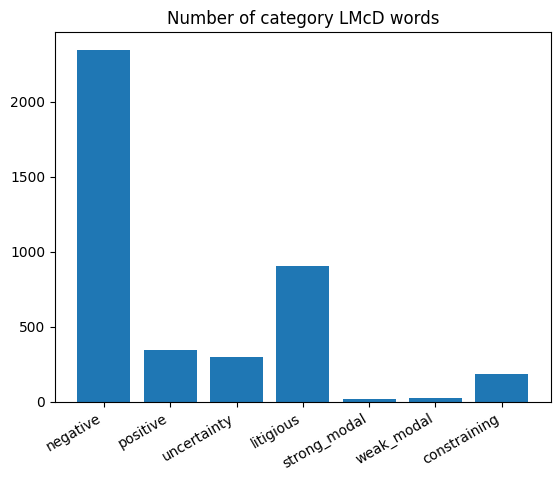

In [9]:
import matplotlib.pylab as plt 

fig, ax = plt.subplots()
labels = list(lmcd_dict.keys())
values = [len(lmcd_dict[word]) for word in labels]
ax.bar(x = labels, height = values)
ax.set_xticks(labels)
ax.set_xticklabels(labels, rotation = 30, ha = "right")
ax.set_title("Number of category LMcD words")
plt.show()

Below you can examine the development of word category frequencies for Apple 's 10-K filings. We can observe how the number of negative and litigious words rise during the great financial crisis. 

In [10]:
import sqlite3
import pandas as pd

db_path = "/Users/ralf/Library/Mobile Documents/com~apple~CloudDocs/Kurse/DLTA/data/dlta_texts.db"

conn = sqlite3.connect(db_path)
sql_query = "SELECT * FROM filings;"
df_filings = pd.read_sql(sql_query, conn)
apple_filings = df_filings[df_filings.ticker == "AAPL"]
apple_filings = apple_filings.sort_values("filingDate")
apple_filings.reset_index(inplace=True, drop=True)
conn.close()

reports = apple_filings.text.tolist()

corpus = ListCorpus(
    reports,
    preprocessor=tokenizer,
    identify_phrases=False,
    create_dictionary_and_countings=False,
    lmcd_countings_only=True
)

lmcd_counts = corpus.lmcd_counts()
lmcd_counts.index = pd.to_datetime(apple_filings.filingDate)
lmcd_counts

2025-01-20 16:30:20,905 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2025-01-20 16:30:23,798 : INFO : built Dictionary<8179 unique tokens: ['"', '#', '$', '%', '&']...> from 21 documents (total 1288242 corpus positions)
2025-01-20 16:30:23,798 : INFO : Dictionary lifecycle event {'msg': 'built Dictionary<8179 unique tokens: [\'"\', \'#\', \'$\', \'%\', \'&\']...> from 21 documents (total 1288242 corpus positions)', 'datetime': '2025-01-20T16:30:23.798978', 'gensim': '4.3.3', 'python': '3.11.7 (main, Dec  4 2023, 18:10:11) [Clang 15.0.0 (clang-1500.1.0.2.5)]', 'platform': 'macOS-15.1.1-arm64-arm-64bit', 'event': 'created'}


,negative,positive,uncertainty,litigious,strong_modal,weak_modal,constraining,n_tokens
filingDate,,,,,,,,
2002-12-19,732,312,485,320,96,223,258,65551
2003-12-19,890,356,541,423,114,233,282,74088
2004-12-03,860,359,498,466,91,246,335,75864
2005-12-01,871,309,453,663,98,262,318,73663
2006-12-29,1174,322,424,899,111,264,379,88083
2007-11-15,867,262,441,737,98,235,313,77719
2008-11-05,901,231,434,790,86,249,279,65957
2009-10-27,846,252,428,787,87,265,292,66218
2010-10-27,585,242,420,396,83,247,277,58332


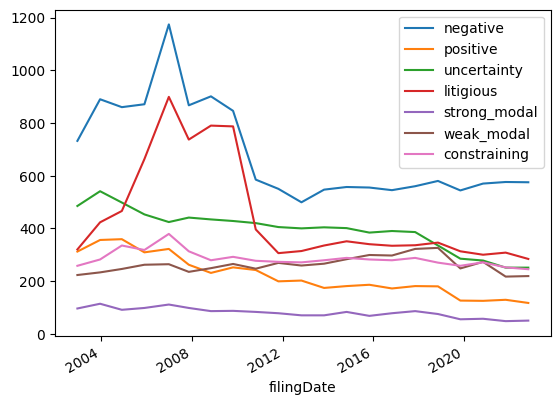

In [11]:
lmcd_counts.drop(["n_tokens"], axis = 1).plot()
plt.show()

Sometimes the occurrence of positive and negative words is translated into polarity. Polarity is the number of positive words minus the number of negative words divided by the overall number of positive and negative words.

$$
polarity = \frac{n^{positive} - n^{negative}}{n^{positive} + n^{negative}}
$$

## Working with document vectors

Each of the techniques presented above, create a vector which represents a document. These representations can be used for all models which are able to process numerical input. This means, we can train a supervised learning algorithm, cluster documents or reduce the high dimension first by dimensionality reduction techniques and proceed this further to supervised or clustering algorithms. For instance, predicting company value, given annual reports or predicting the sentiment (positive, neutral, negative) of a news article. 

Besides, as documents are vectors, we can directly use vector calculus to extract information w.r.t different documents. A useful information is to determine the similarity between documents according to their document vectors. Two popular choices to quantify this similarity are the *euclidean distance* or the *cosine similarity*.

Given the document vectors $\boldsymbol{x}_i$ and $\boldsymbol{x}_k$, the euclidean distance is defined by:

$$
d_{euclidean}\left( \boldsymbol{x}_i, \boldsymbol{x}_k \right) = \sqrt{ \sum_{j=1}^{d} \left(x_{ij} - x_{kj} \right)^2} = ||\boldsymbol{x}_i - \boldsymbol{x}_k||
$$

The lower this value, the more close the document vectors are to each other, the more similar they should be. Cosine similarity is defined by:

$$
d_{cosine} (\boldsymbol{x}_i, \boldsymbol{x}_{k}) = \frac{\sum_{j = 1}^d  x_{ij} x_{kj}}{\sqrt{ \sum_{j = 1}^d x_{ij}^2} \sqrt{ \sum_{j = 1}^d x_{kj}^2}} = \frac{\boldsymbol{x}_i \boldsymbol{x}_k}{|| \boldsymbol{x}_i || || \boldsymbol{x}_k ||}
$$

Hereby, $|| \mathbf{x} ||$ denotes the length of the vector defined by: $|| \mathbf{x} || = \sqrt{ x_1^2 + x_2^2 + ... + x_d^2 }$. Cosine similarity determines the cosine of the angle between vectors and can have values in the range $[-1, 1]$. If each vector has only non-negative values, its range is in $[0, 1]$. The smaller the angle between the vectors, the higher the value for cosine similarity. The higher the cosine similarity, the more similar are the document vectors, while a larger euclidean distance indicates less similar documents. Sometimes, the cosine distance is used instead of the cosine similarity. Cosine distance is just $ 1 - d_{cosine} (\boldsymbol{x}_i, \boldsymbol{x}_{k})$.

Let us discuss both metrics by means of a simplified example. Let us assume we want to compare two documents which are represented by two term frequencies (e.g., number of the word "good" and number of the word "bad"). Take a look at the cell below. We can observe that the first document has more occurrences for the word "bad" in comparison to the word "good". This is flipped for the second document. Furthermore, the second document overall uses both terms with higher frequencies, i.e, "good" plus "bad" is equal to 25 for document number one and 80 for document number two. The latter may occur if the documents have different lengths. 

In [12]:
import numpy as np
import pandas as pd

X = np.array([[10, 15], [45, 35]])
tf = pd.DataFrame(X, columns = ["good", "bad"], index = ["d1", "d2"])
tf

,good,bad
d1,10,15
d2,45,35


If we calculate the euclidean distance for the raw document vectors, we get:

$$
d_{euclidean}\left( \boldsymbol{x}_1, \boldsymbol{x}_2 \right) = \sqrt{ (10 - 45)^2 + (15 - 35)^2 } = \sqrt{(-35)^2 + (-20)^2} = 40.31
$$

For the cosine similarity, we first determine the unit-norm of each vector:

$$
\mathbf{x}_1 = \sqrt{10^2 + 15^2} = 18.03 \\
\mathbf{x}_2 = \sqrt{45^2 + 35^2} = 57.01 \\
$$

Note, that the overall higher number of term frequencies for document number two is quantified by its length, sometimes also called magnitude. The numerator of the cosine similarity is the dot product of the term frequency vectors:

$$
\mathbf{x_1} \mathbf{x_2} = (10 \cdot 45) + (15 \cdot 35) = 975
$$

Thus, the final value of the cosine similarity is:

$$
d_{cosine}\left( \boldsymbol{x}_1, \boldsymbol{x}_2 \right) = \frac{975}{18.03 \cdot 57.01} = 0.95
$$

The numbers for a single pair of documents are hard to interpret, however, usually these pairwise similarities are determined for a large number of documents. Finally, it is important to realize that cosine similarity normalizes vectors by their length. Thus, it implicitly takes into account if documents overall have different raw term frequencies.

You can see this as the mathematical operation for determining cosine similarity is associative. This means, the result is the same, no matter if we first determine the dot product of the vectors and normalize by the product of vector lengths or if we first normalize the vectors by their length and determine the dot product of these normalized vectors. 

If the euclidean distance should account for differences in the overall number of term frequencies, we first need to normalize raw term frequency vectors to unit length and determine the euclidean distance between the unit vectors. If we do this for our example, we get the normalized vectors by dividing each element through the vector's length.

In [13]:
X_normalized = np.array([v / np.linalg.norm(v) for v in X])
tf_normalized = pd.DataFrame(X_normalized, columns = ["good", "bad"], index = ["d1", "d2"]).round(2)
tf_normalized

,good,bad
d1,0.55,0.83
d2,0.79,0.61


And determine the distance as before. This gives us:

$$
d_{euclidean}\left( || \boldsymbol{x}_1 ||, || \boldsymbol{x}_2 || \right) = \sqrt{ (0.55^2 - 0.79)^2 + (0.83 - 0.61)^2 } = \sqrt{(-35)^2 + (-20)^2} = 0.33
$$

As stated before, this is just a mathematical exercise here, however, it may have a larger impact once we use this measure to conduct multiple pairwise comparisons between different documents. The similarity calculations are visualized below. The left plot illustrates the raw term frequencies, while the right plot exhibits the situation for normalized vectors.

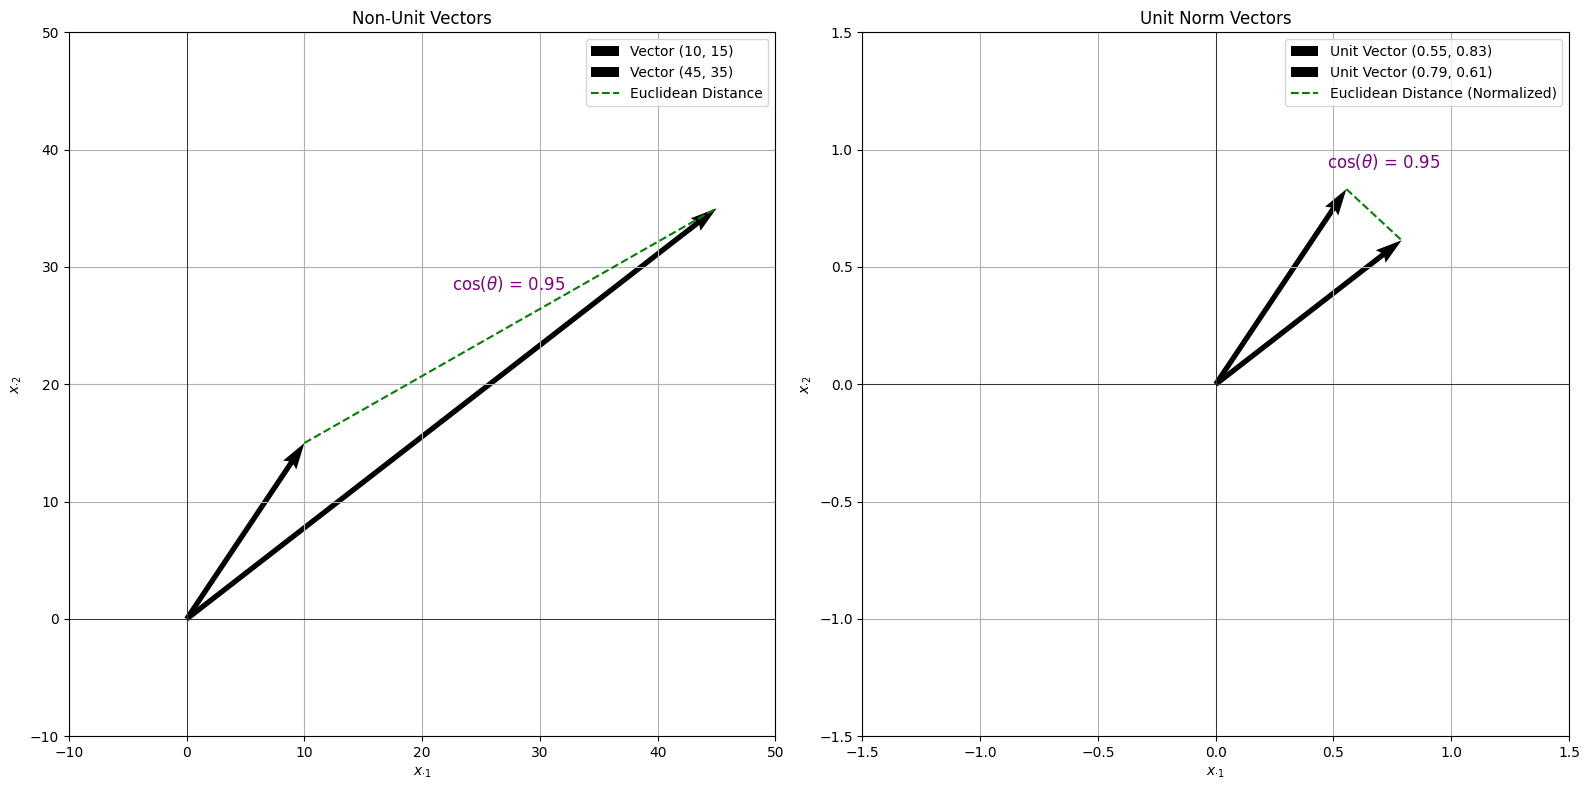

In [14]:
import numpy as np
import matplotlib.pylab as plt
import math

# Define the vectors
X = np.array([[10, 15], [45, 35]])

# Normalize each vector
X_normalized = np.array([v / np.linalg.norm(v) for v in X])

# Calculate the angle between the vectors in radians
dot_product = np.dot(X[0], X[1])
magnitude_1 = np.linalg.norm(X[0])
magnitude_2 = np.linalg.norm(X[1])
cos_theta = dot_product / (magnitude_1 * magnitude_2)
theta = math.acos(cos_theta)  # Angle in radians

# Convert to degrees for readability
theta_degrees = math.degrees(theta)

# Calculate the angle between the normalized vectors (should remain the same)
dot_product_normalized = np.dot(X_normalized[0], X_normalized[1])
theta_normalized = math.acos(dot_product_normalized)  # Angle in radians
theta_degrees_normalized = math.degrees(theta_normalized)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Non-unit vectors
ax1 = axes[0]
for vector in X:
    ax1.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, label=f"Vector ({vector[0]}, {vector[1]})")
# Euclidean distance line
start_point = X[0]
end_point = X[1]
ax1.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'g--', label="Euclidean Distance")
# Annotate angle
midpoint = (start_point + end_point) / 2
ax1.text(midpoint[0] - 5, midpoint[1] + 3, r"$\cos(\theta)$ = {:.2f}".format(cos_theta), fontsize=12, color="purple")
# Configure plot
ax1.set_xlim(-10, 50)
ax1.set_ylim(-10, 50)
ax1.grid(True)
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.set_xlabel(r'$x_{\cdot 1}$')
ax1.set_ylabel(r'$x_{\cdot 2}$')
ax1.legend()
ax1.set_title('Non-Unit Vectors')

# Plot 2: Unit vectors
ax2 = axes[1]
for vector in X_normalized:
    ax2.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, label=f"Unit Vector ({vector[0]:.2f}, {vector[1]:.2f})")
# Euclidean distance line (normalized)
start_point = X_normalized[0]
end_point = X_normalized[1]
ax2.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'g--', label="Euclidean Distance (Normalized)")
# Annotate angle
midpoint_normalized = (start_point + end_point) / 2
ax2.text(midpoint_normalized[0] - 0.2, midpoint_normalized[1] + 0.2, 
         r"$\cos(\theta)$ = {:.2f}".format(cos_theta), fontsize=12, color="purple")
# Configure plot
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.grid(True)
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.set_xlabel(r'$x_{\cdot 1}$')
ax2.set_ylabel(r'$x_{\cdot 2}$')
ax2.legend()
ax2.set_title('Unit Norm Vectors')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

To demonstrate the consequences of not normalizing term frequencies, we get back to the previous example with the three company descriptions of Apple, Microsoft and Morgan Stanley. First, we determine the euclidean distance using raw term frequencies. According to it, the description of Apple to Microsoft is more different to the descriptions of Apple and Morgan Stanley. 

In [48]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances

ec_raw = pd.DataFrame(euclidean_distances(tfs), columns = ["AAPL", "MSFT", "MS"], index = ["AAPL", "MSFT", "MS"]).round(4)
ec_raw

,AAPL,MSFT,MS
AAPL,0.0000,32.9393,31.8277
MSFT,32.9393,0.0000,28.7054
MS,31.8277,28.7054,0.0000


This changes, when we determine the euclidean distance based on unit vectors.

In [47]:
l2_norms = np.linalg.norm(tfs, axis = 1, keepdims=True)
tfs_normalized = tfs.div(l2_norms, axis=0)

ec_norm = pd.DataFrame(euclidean_distances(tfs_normalized), columns = ["AAPL", "MSFT", "MS"], index = ["AAPL", "MSFT", "MS"]).round(4)
ec_norm

,AAPL,MSFT,MS
AAPL,0.0000,0.5170,0.5356
MSFT,0.5170,0.0000,0.4459
MS,0.5356,0.4459,0.0000


This relationship is the same as measured by the cosine *distance* shown below.

In [49]:
cs = pd.DataFrame(cosine_distances(tfs), columns = ["AAPL", "MSFT", "MS"], index = ["AAPL", "MSFT", "MS"]).round(4)
cs

,AAPL,MSFT,MS
AAPL,0.0000,0.1336,0.1434
MSFT,0.1336,0.0000,0.0994
MS,0.1434,0.0994,0.0000


Note that already these rather simple term frequency based approaches have been utilized in the academic field of financial markets. For instance, [Cohen et. al (2020)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1658471) examine differences between annual reports of companies and detect that changes often signal a decrease in the company's stock market value. Another paper utilizing bag-of-words representations together with machine learning algorithms is presented by [Frankel et. al (2022)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3845780) who show that stock market reactions can be explained to a certain extend by financial sentiment predictions which are based on company reports and earning call transcripts. Another interesting application of term-frequency inverse-document-frequency vectors and their cosine similarities is used by [Engle et. al (2020)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3317570). They determine similarities of daily newspaper articles and a tf-idf vector based on climate change reports to identify when news are paying more attention to this topic. From a financial perspective, in these times, companies are more exposed to financial risks which are related to transition and physical climate change risks.

## Summary

This chapter is supposed to give you a first impression how text can be transformed and used by different statistical and machine learning methods. Overall, the first steps always include certain decisions regarding textual normalization and pre-processing. Afterwards, unstructured text is transformed to structured numerical representations. When using term frequency based approaches, we may include the scarcity of individual terms by inverse-document-frequency weights. Furthermore, vector normalization can be useful to account for an overall different number of tokens among documents. 

The frequency based approaches ignore sequential order, meaning and context of documents. Nevertheless, they often can be applied in useful ways. More modern language models also create numerical representations of terms and documents. However, these are able to capture meaning and context. 